# 7. Ensemble Learning and Random Forests

- A group of predictors is called an *ensemble*
- Aggregating the predictions of an ensemble is called *ensemble learning*
- An ensemble learning algorithm is called an *ensemble method*

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Voting Classifiers

- Given a ensemble of classifiers, a *hard voting* classifier predicts the class that has the most 'votes' among the individual classifiers
- A *soft voting* classifier predicts the class which the highest class probability, averaged over the individual classifiers
- Soft voting gives more weight to confident votes so is more accurate, but requires each individual classifier to estimate class probabilities
- Even if the individual classifiers are *weak learners* (low accuracy), the ensemble can be a *strong learner* (high accuracy)
- Voting classifiers work best if the individual classifiers are indepedent, making uncorrelated errors - this is not the case in practice because the are trained on the same data so are likely to make the same errors
- To approximate independence it is best to use diverse classifiers trained using very different algorithms, so they make diverse errors

In [106]:
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score

# generate sample data - 2 interleaving half circles
X, y = make_moons(n_samples=200, noise=0.3, random_state=42)

# split into train and test sets, preserving prooprtion of each class
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(X, y):
    X_train = X[train_index]
    y_train = y[train_index]

    X_test = X[test_index]
    y_test = y[test_index]

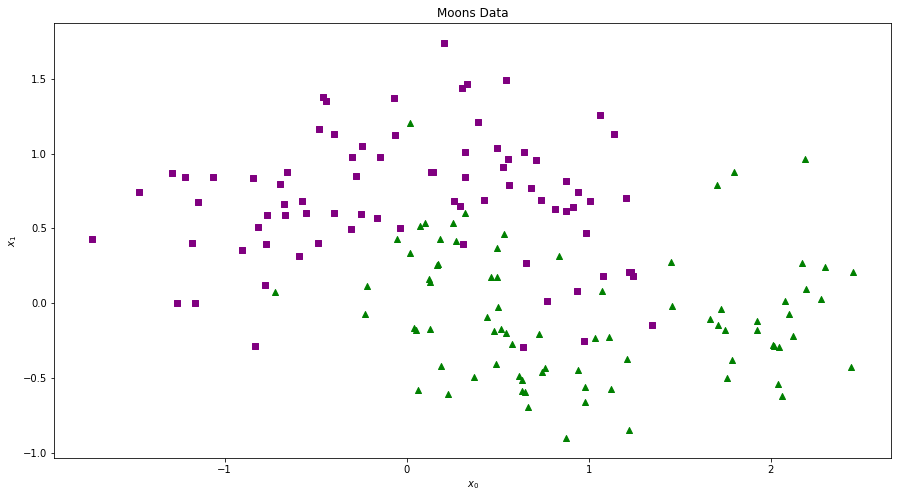

In [107]:
def plot_binary_data(X, y):
    plt.scatter(
        X[:, 0][y == 1],
        X[:, 1][y == 1],
        marker="^",
        color="green",
    )
    plt.scatter(
        X[:, 0][y == 0],
        X[:, 1][y == 0],
        marker="s",
        color="purple",
    )


fig, ax = plt.subplots(figsize=(15, 8))

plot_binary_data(X_train, y_train)

ax.set_xlabel("$x_0$")
ax.set_ylabel("$x_1$")

ax.set_title("Moons Data");

In [108]:
svc_clf = SVC(probability=True, kernel="linear", gamma="scale", random_state=42)
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
for_clf = RandomForestClassifier(n_estimators=100, random_state=42)

estimators = [
    ("log", log_clf),
    ("svc", svc_clf),
    ("for", for_clf)
]

hard_vote_clf = VotingClassifier(estimators=estimators, voting="hard")
soft_vote_clf = VotingClassifier(estimators=estimators, voting="hard")

hard_vote_clf.fit(X_train, y_train)
soft_vote_clf.fit(X_train, y_train);

In [109]:
# VotingClassifier clones the estimators and stores them in estimators_
for clf in hard_vote_clf.estimators_:
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, ": ", accuracy_score(y_test, y_pred))

y_pred = hard_vote_clf.predict(X_test)
print("HardVoting: ", accuracy_score(y_test, y_pred))

y_pred = soft_vote_clf.predict(X_test)
print("SoftVoting: ", accuracy_score(y_test, y_pred))

LogisticRegression :  0.875
SVC :  0.875
RandomForestClassifier :  0.85
HardVoting:  0.9
SoftVoting:  0.9


In this case hard and soft voting give the same result in this case, but you get the idea.